In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import re

In [2]:
df = pd.read_csv('gsm.csv', sep=',', low_memory=False)
df

,oem,model,network_technology,network_2g_bands,network_gprs,network_edge,launch_announced,launch_status,body_dimensions,body_weight,...,main_camera_dual_or_triple,battery_music_play,selfie_camera_triple,main_camera_v1,selfie_camera,camera,main_camera,network,battery_talk_time,battery_stand.by
0,Benefon,Vega,GSM,GSM 900,No,No,1999,Discontinued,145 x 56 x 23 mm (5.71 x 2.20 x 0.91 in),190 g (6.70 oz),...,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,4 - 10 h,3 - 6 days
1,Garmin-Asus,nuvifone M10,GSM / HSPA,GSM 900 / 1800 / 1900,NaN,NaN,"2010, January. Released 2010, March",Discontinued,-,-,...,NaN,NaN,NaN,NaN,V2,NaN,NaN,GSM 850 / 1800 / 1900 - US version,Up to 8 h,Up to 600 h (2G) / Up to 600 h (3G)
2,Gigabyte,GSmart G1305 Boston,GSM / HSPA,GSM 850 / 900 / 1800 / 1900,NaN,NaN,"2010, April. Released 2010, April",Discontinued,116 x 56.8 x 12.4 mm (4.57 x 2.24 x 0.49 in),118 g (4.16 oz),...,NaN,NaN,NaN,NaN,V2,NaN,NaN,NaN,Up to 7 h 10 min,Up to 410 h
3,Gigabyte,GSmart,GSM / HSPA,GSM 900 / 1800,NaN,NaN,Not officially announced yet,Cancelled,103 x 54 x 13.4 mm (4.06 x 2.13 x 0.53 in),-,...,NaN,NaN,NaN,NaN,V2,NaN,NaN,NaN,NaN,NaN
4,Google,Pixel 4 XL,GSM / CDMA / HSPA / EVDO / LTE,GSM 850 / 900 / 1800 / 1900,NaN,NaN,"2019, October 15","Available. Released 2019, October 22",160.4 x 75.1 x 8.2 mm (6.31 x 2.96 x 0.32 in),193 g (6.81 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDMA 800 / 1900,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10674,ZTE,F600,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,Class 10,Class 10,2009. Released 2009,Discontinued,103 x 48 x 13.5 mm (4.06 x 1.89 x 0.53 in),90 g (3.17 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10675,ZTE,F103,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,Class 10,Class 10,2009. Released 2009,Discontinued,105 x 46 x 12.6 mm (4.13 x 1.81 x 0.50 in),90 g (3.17 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10676,ZTE,F101,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,Class 10,Class 10,2009. Released 2009,Discontinued,105 x 46 x 12.6 mm (4.13 x 1.81 x 0.50 in),90 g (3.17 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10677,ZTE,F100,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,Class 10,Class 10,2009. Released 2009,Discontinued,105 x 46 x 12.6 mm (4.13 x 1.81 x 0.50 in),90 g (3.17 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10679 entries, 0 to 10678
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   oem                         10679 non-null  object
 1   model                       10679 non-null  object
 2   network_technology          10679 non-null  object
 3   network_2g_bands            10355 non-null  object
 4   network_gprs                9714 non-null   object
 5   network_edge                9720 non-null   object
 6   launch_announced            10679 non-null  object
 7   launch_status               10679 non-null  object
 8   body_dimensions             10679 non-null  object
 9   body_weight                 10587 non-null  object
 10  body_sim                    10678 non-null  object
 11  display_type                10679 non-null  object
 12  display_size                9287 non-null   object
 13  display_resolution          10630 non-null  ob

In [4]:
def outl(x):
    if type(x) == list and len(x)>0:
        return x[0]
    else:
        return np.nan

In [5]:
s_cpu = df['platform_cpu'].replace('\dx', ' ', regex=True).str.findall('(\d[0-9.]{1,4}\d).(MHz|GHz){1}').apply(outl)
s_cpu = s_cpu[s_cpu.isna() == False].apply(lambda x: x[0] if x[1] == 'GHz' else float(x[0]) * 0.001).astype(float)
s_cpu

1        0.600
2        0.600
3        0.528
4        2.840
5        2.840
         ...  
10642    0.500
10644    0.600
10646    0.600
10659    0.600
10666    0.528
Name: platform_cpu, Length: 6488, dtype: float64

In [6]:
s_memory = df['memory_internal'].str.findall('^(\d+GB|\d+ GB|\d+MB|\d+ MB)').apply(outl)
s_memory = s_memory.str.findall('(\d+)(.+)').apply(outl)
s_memory = s_memory[s_memory.isna() == False].apply(lambda x: x[0] if x[1].strip() == 'MB' else float(x[0]) * 1024).astype(float)
s_memory

1         4096.0
2          256.0
3          256.0
4        65536.0
5        65536.0
          ...   
10659      256.0
10661        5.0
10666      256.0
10670       60.0
10678        4.0
Name: memory_internal, Length: 7903, dtype: float64

In [7]:
df['network_speed'] = df['network_speed'].str.replace('EV-DO Rev.0, 153.2 Kbps', 'EV-DO Rev.0 153.2 kbps', regex=True)
s_speed = df['network_speed'].str.split(',')[df['network_speed'].isna() == False].apply(lambda x:
             x[:len(x)] if 'EV-DO' in x[-1] and len(x)>1 else x).apply(lambda x: x[len(x) - 1].strip())
s_speed = s_speed[s_speed.isna() == False].str.findall(r'(\d[0-9./]{1,20}).(Mbps|kbps)').apply(outl)
s_speed = s_speed[s_speed.isna() == False].apply(lambda x: float(re.findall(r'[0-9.]+', x[0])[0]) if x[1] == 'Mbps' else float(re.findall(r'[0-9.]+', x[0])[0]) * 0.001)
s_speed

1           7.200
2           7.200
3           7.200
4        1200.000
5        1200.000
           ...   
10673       3.600
10674       0.384
10675       0.384
10676       0.384
10677       0.384
Name: network_speed, Length: 4840, dtype: float64

In [8]:
s_w = df['misc_sar']
s_w = s_w.str.replace(r'<..>+', '', regex=True).str.replace('\xa0', '')
s_w = s_w[s_w.isna() == False].str.findall(r'.+\(head\)').apply(outl).str.findall(r'\d\.\d\d').apply(outl).astype(float)
s_w

133      0.99
135      0.79
136      0.79
160      0.34
175      0.85
         ... 
10479    0.88
10553    0.65
10589    1.20
10599    0.76
10633    0.59
Name: misc_sar, Length: 2180, dtype: float64

In [9]:
s_len = df['body_dimensions']
s_len = s_len[s_len.isna() == False].str.split(' x ')
s_len = s_len.apply(lambda x: x[0] if str(x[0]).replace('.','',1).isdigit() else np.nan)
s_len = s_len[s_len.isna() == False].astype(float)
s_len

0        145.0
2        116.0
3        103.0
4        160.4
5        147.1
         ...  
10674    103.0
10675    105.0
10676    105.0
10677    105.0
10678    106.0
Name: body_dimensions, Length: 10304, dtype: float64

In [10]:
s_cam = df[['main_camera_single', 'main_camera_dual', 'main_camera_quad', 'main_camera_triple',
            'main_camera_five', 'main_camera_dual_or_triple', 'camera', 'main_camera_v1', 'main_camera']].copy(deep=True)

s_cam['camera'] = s_cam['camera'].apply(lambda x: np.nan if x == 'VGA' or x == 'V2' else x)
s_cam['camera'] = s_cam['camera'].apply(lambda x: '' if x != x else x)
s_cam['main_camera_v1'] = s_cam['main_camera_v1'].apply(lambda x: '' if x != x else x)
s_cam['main_camera'] = s_cam['main_camera'].apply(lambda x: '' if x != x else x)
s_cam['camera_new'] = s_cam[['camera', 'main_camera_v1', 'main_camera']].astype(str).sum(axis=1).apply(lambda x: np.nan if x == '' else x)
s_cam.drop(['camera', 'main_camera_v1', 'main_camera'], 1)
s_cam['main_camera_single'] = s_cam['main_camera_single'].str.findall(r'[0-9.]+ MP').apply(outl)
s_cam['main_camera_dual'] = s_cam['main_camera_dual'].str.findall(r'[0-9.]+ MP').apply(outl)
s_cam['main_camera_quad'] = s_cam['main_camera_quad'].str.findall(r'[0-9.]+ MP').apply(outl)
s_cam['main_camera_triple'] = s_cam['main_camera_triple'].str.findall(r'[0-9.]+ MP').apply(outl)
s_cam['main_camera_five'] = s_cam['main_camera_five'].str.findall(r'[0-9.]+ MP').apply(outl).apply(lambda x: x if str(x).strip().replace('.','',1).isdigit() else np.nan )
s_cam['main_camera_dual_or_triple'] = s_cam['main_camera_dual_or_triple'].str.findall(r'[0-9.]+ MP').apply(outl)
s_cam = s_cam.drop(['main_camera_v1', 'main_camera', 'camera'], 1)

s_cam['main_camera_single'] = s_cam['main_camera_single'].apply(lambda x: '' if x != x else x)
s_cam['main_camera_dual'] = s_cam['main_camera_dual'].apply(lambda x: '' if x != x else x)
s_cam['main_camera_quad'] = s_cam['main_camera_quad'].apply(lambda x: '' if x != x else x)
s_cam['main_camera_triple'] = s_cam['main_camera_triple'].apply(lambda x: '' if x != x else x)
s_cam['main_camera_five'] = s_cam['main_camera_five'].apply(lambda x: '' if x != x else x)
s_cam['main_camera_dual_or_triple'] = s_cam['main_camera_dual_or_triple'].apply(lambda x: '' if x != x else x)
s_cam['camera_new'] = s_cam['camera_new'].apply(lambda x: '' if x != x else x)
s_cam = s_cam.sum(axis=1).replace(' MP', '', regex=True).replace('No', '0').apply(lambda x: x if x!='' else np.nan).astype(float)
s_cam = s_cam.apply(lambda x: x * 1000000)
s_cam
# ПРОВЕРИТЬ ЧЕРЕЗ СУММУ МАСОК

0               0.0
1         5000000.0
2         5000000.0
3         2000000.0
4        12200000.0
            ...    
10674     3150000.0
10675     2000000.0
10676     2000000.0
10677     2000000.0
10678           0.0
Length: 10679, dtype: float64

In [11]:
s_res = df['display_resolution']
s_res = s_res.str.findall(r'\d{1,5} x \d{1,5}').apply(outl)
s_res = s_res.str.findall(r'\d+')
s_res = s_res[s_res.isna() == False].apply(lambda x: float(x[0]) * float(x[1]))
s_res

1         384000.0
2         153600.0
3          76800.0
4        4377600.0
5        2462400.0
           ...    
10674      76800.0
10675      38720.0
10676      38720.0
10677      38720.0
10678      16384.0
Name: display_resolution, Length: 10515, dtype: float64

In [12]:
s_year = df['launch_announced']
s_year

0                                       1999
1        2010, January. Released 2010, March
2          2010, April. Released 2010, April
3               Not officially announced yet
4                           2019, October 15
                        ...                 
10674                    2009. Released 2009
10675                    2009. Released 2009
10676                    2009. Released 2009
10677                    2009. Released 2009
10678               2007, May. Released 2007
Name: launch_announced, Length: 10679, dtype: object

In [13]:
month_dict = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7,
              'August' : 8, 'September' : 9, 'October' : 10, 'November' : 11, 'December' : 12}
def dats(x, month_dict):    
    year = float(outl(re.findall(r'\d{4}', x)))
    
    month = re.findall(r'[a-zA-Z]{3,9}', x)
    if len(month) == 0 or month == None:
        month = 0
    elif len(month)>0:
        if month[0] == None:
            month = 0
        else:
            month = month_dict.get(month[0])
            if month == None:
                month = 0
    else:
        month = 0
#     date = 
    return year + month / 13
dats('2010, April. Released 2010, April', month_dict)

2010.3076923076924

In [14]:

s_year = df['launch_announced']
s_year = s_year[s_year.isna() == False].apply(lambda x: dats(x, month_dict))
# s_year = s_year.apply(lambda x: np.nan if x.isdigit() == False else x)
# s_year = s_year.apply(lambda x: month_dict.get(x[1]))
s_year

0        1999.000000
1        2010.076923
2        2010.307692
3                NaN
4        2019.769231
            ...     
10674    2009.000000
10675    2009.000000
10676    2009.000000
10677    2009.000000
10678    2007.384615
Name: launch_announced, Length: 10679, dtype: float64

In [15]:
def price(x):
    if len(x) == 3:
        if x[2] == 'EUR' and str(x[1]).isdigit():
            return float(x[1])
        elif x[2] == 'USD' and str(x[1]).isdigit():
            return float(x[1]) * 0.85
        elif x[2] == 'INR' and str(x[1]).isdigit():
            return float(x[1]) * 0.012
        else:
            return np.nan
    elif len(x) == 2:
        if str(x[0]).replace('.','',1).isdigit():
            return float(x[0]) * 0.85
        else:
            if ('$' in str(x[0])) and (len(str(x[0]))) > 1:
                return float(x[0].replace('$', '')) * 0.85
            elif ('$' in str(x[0])) and (len(str(x[0]))) == 1:
                return float(x[1]) * 0.85
            else:
                return np.nan
    elif len(x) == 1:
        if '$' in str(x[0]) and x[0].replace('.','',1).isdigit():
            return float(x[0].replace('$', '')) * 0.85
        else:
            if x[0].replace('.','',1).isdigit():
                return float(x[0]) * 0.85
            else:
                return np.nan

In [16]:
print(' ' == ' ')

False


In [17]:
# s_price = df['misc_price'].str.findall(r'[0-9]{1,4} [\D|$|€]{1,4}').apply(outl)
# s_price.value_counts().tail(60)
s_price = df['misc_price'].str.replace(r'<..>', '', regex=True).str.split('/').apply(outl).apply(lambda x: str(x) if x == x else np.nan)
# s_price = s_price[s_price.notnull()].str.findall('(\d[0-9.]{1,4}\d).(MHz|GHz){1}')
s_price = s_price[s_price.notnull()].str.split(r'[  ]').apply(lambda x: price(x))
s_price.value_counts().head(60)

100.0    339
70.0     317
150.0    309
120.0    290
80.0     286
90.0     262
130.0    254
110.0    245
200.0    236
60.0     194
180.0    193
50.0     186
250.0    176
140.0    165
170.0    162
160.0    161
40.0     152
300.0    145
30.0     143
220.0    130
230.0    124
190.0    120
20.0     110
210.0    101
280.0     96
260.0     90
270.0     84
350.0     74
290.0     74
240.0     70
400.0     65
330.0     55
320.0     45
310.0     41
360.0     34
420.0     32
450.0     30
500.0     30
380.0     29
340.0     29
370.0     29
550.0     23
390.0     22
440.0     21
430.0     20
10.0      19
410.0     17
700.0     15
470.0     14
480.0     11
650.0     11
460.0     11
600.0     11
108.0     11
800.0      9
530.0      9
880.0      7
68.0       7
84.0       7
900.0      7
Name: misc_price, dtype: int64

In [18]:
s_ratio = df['display_size'].str.findall(r'~[0-9.]{4}%').apply(outl).str.replace(r'[~%]', '', regex=True).astype(float)
s_ratio

0         NaN
1         NaN
2        46.3
3        43.7
4        81.3
         ... 
10674    36.1
10675    26.1
10676    26.1
10677    26.1
10678     NaN
Name: display_size, Length: 10679, dtype: float64

In [19]:
check = pd.DataFrame([s_year, s_speed, s_cpu, s_memory, s_w, s_len, s_ratio]).T
repl = {'launch_announced': 'year', 'network_speed': 'speed', 'platform_cpu': 'cpu', 'memory_internal': 'memory',
        'misc_sar': 'w', 'body_dimensions': 'slen', 'display_size': 'ratio'}
check.rename(columns=repl, inplace=True)
check

,year,speed,cpu,memory,w,slen,ratio
0,1999.000000,NaN,NaN,NaN,NaN,145.0,NaN
1,2010.076923,7.200,0.600,4096.0,NaN,NaN,NaN
2,2010.307692,7.200,0.600,256.0,NaN,116.0,46.3
3,NaN,7.200,0.528,256.0,NaN,103.0,43.7
4,2019.769231,1200.000,2.840,65536.0,NaN,160.4,81.3
...,...,...,...,...,...,...,...
10674,2009.000000,0.384,NaN,NaN,NaN,103.0,36.1
10675,2009.000000,0.384,NaN,NaN,NaN,105.0,26.1
10676,2009.000000,0.384,NaN,NaN,NaN,105.0,26.1
10677,2009.000000,0.384,NaN,NaN,NaN,105.0,26.1


# Графики

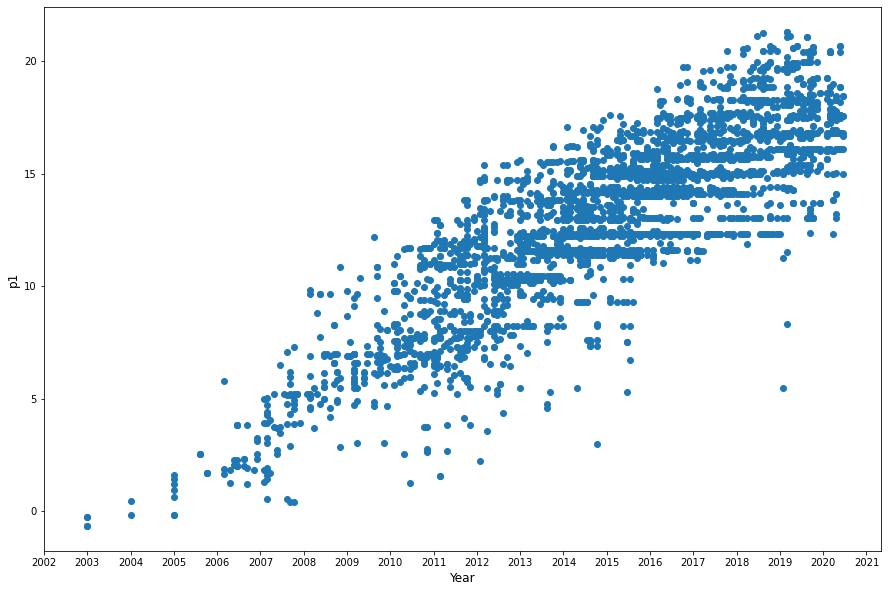

In [40]:
df1 = check[['speed', 'cpu', 'memory', 'year']][(check['speed'].isna() == False) & (check['cpu'].isna() == False) & 
      (check['memory'].isna() == False) & (check['year'].isna() == False)]
y1 = np.log(df1['speed'] / (df1['cpu'] * df1['memory']) ** -1)#.sort_values(ascending=False)
# y1 = np.log(y1[df1['cpu'] < 2]).sort_values(ascending=False)
# x1 = np.linspace(1, 3671, 3671)
x1 = df1['year']

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x1, y1)
ax.set_xticks(np.arange(2002, 2022))

plt.xlabel('Year', fontsize=12)
plt.ylabel('p1', fontsize=12)


# a.yaxis.set_major_locator((MultipleLocator(1)))
plt.show()
# len(y1)

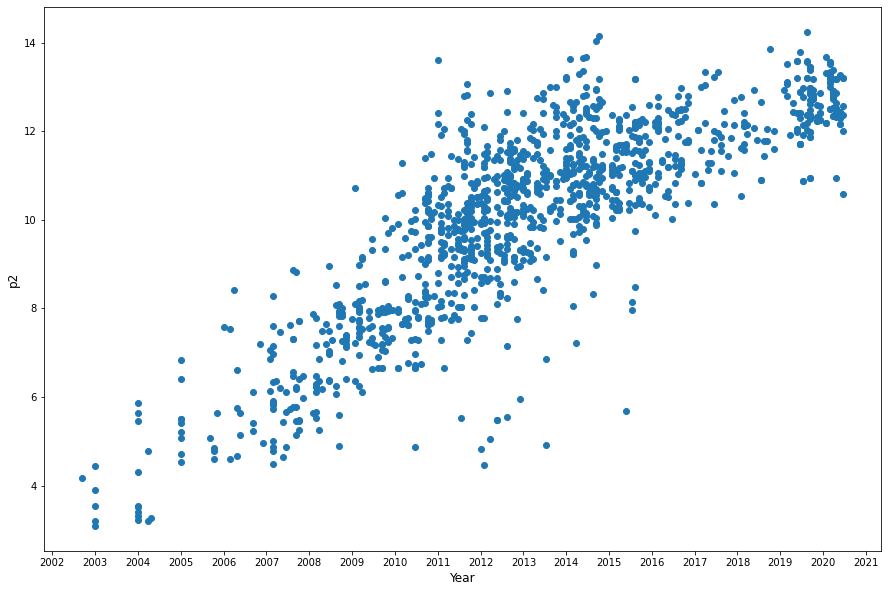

In [47]:
df2 = check[['w', 'slen', 'cpu', 'year']][(check['w'].isna() == False) & (check['slen'].isna() == False) & 
      (check['cpu'].isna() == False) & (check['year'].isna() == False)]
y2 = np.log((df2['w'] / ((df2['slen'] ** 2) * (df2['cpu'] ** 3))) ** -1)#.sort_values(ascending=False)
# x2 = np.linspace(1, 1242, 1242)
x2 = df2['year']#.sort_values(ascending=False)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x2, y2)
ax.set_xticks(np.arange(2002, 2022))

plt.xlabel('Year', fontsize=12)
plt.ylabel('p2', fontsize=12)

plt.show()

c:\users\maks\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


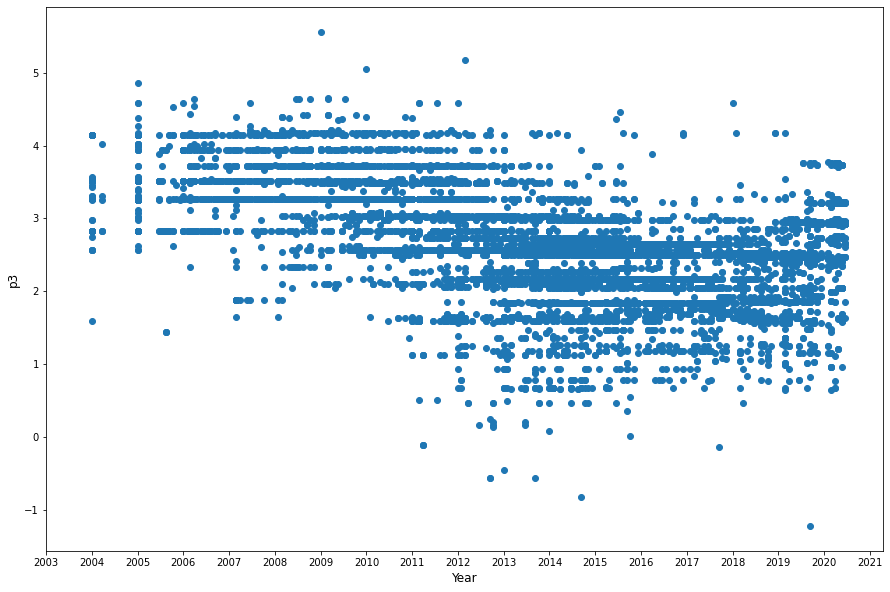

In [49]:
df3 = pd.DataFrame([s_cam, s_res, s_year]).T
df3 = df3[(df3['Unnamed 0'].isna() == False) & (df3['display_resolution'].isna() == False) & 
          (df3['launch_announced'].isna() == False)]
# df3
x3 = df3['launch_announced']
# x3 = np.linspace(1, 9352, 9352)
y3 = np.log((df3['Unnamed 0'] / df3['display_resolution']) ** 1)#.sort_values(ascending=False)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x3, y3)
ax.set_xticks(np.arange(2003, 2022))

plt.xlabel('Year', fontsize=12)
plt.ylabel('p3', fontsize=12)
plt.show()

In [50]:
check['p1'] = y1
check['p2'] = y2
check['p3'] = y3
check['oem'] = df['oem']
check['cam'] = s_cam
check['disp'] = s_res
check['price'] = s_price

check

,year,speed,cpu,memory,w,slen,ratio,p1,p2,p3,oem,cam,disp,price
0,1999.000000,NaN,NaN,NaN,NaN,145.0,NaN,NaN,NaN,NaN,Benefon,0.0,NaN,NaN
1,2010.076923,7.200,0.600,4096.0,NaN,NaN,NaN,9.781022,NaN,2.566551,Garmin-Asus,5000000.0,384000.0,310.00
2,2010.307692,7.200,0.600,256.0,NaN,116.0,46.3,7.008433,NaN,3.482841,Gigabyte,5000000.0,153600.0,110.00
3,NaN,7.200,0.528,256.0,NaN,103.0,43.7,NaN,NaN,NaN,Gigabyte,2000000.0,76800.0,NaN
4,2019.769231,1200.000,2.840,65536.0,NaN,160.4,81.3,19.224236,NaN,1.024935,Google,12200000.0,4377600.0,577.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10674,2009.000000,0.384,NaN,NaN,NaN,103.0,36.1,NaN,NaN,3.713953,ZTE,3150000.0,76800.0,NaN
10675,2009.000000,0.384,NaN,NaN,NaN,105.0,26.1,NaN,NaN,3.944546,ZTE,2000000.0,38720.0,NaN
10676,2009.000000,0.384,NaN,NaN,NaN,105.0,26.1,NaN,NaN,3.944546,ZTE,2000000.0,38720.0,NaN
10677,2009.000000,0.384,NaN,NaN,NaN,105.0,26.1,NaN,NaN,3.944546,ZTE,2000000.0,38720.0,NaN


In [51]:
# np.percentile(check.price, [1.0, 99.0])
left = check.price.quantile(0.05)
right = check.price.quantile(0.95)
check.price = check.price.apply(lambda x: x if x >=left and x <= right else np.nan)

1 
С 7 по 4.5 
И ещё два
По максимумам выявлять 
Тупо выделить классы линейной зависимостью 
И посмотреть, что за объекты внутри

In [52]:
check.describe()

,year,speed,cpu,memory,w,slen,ratio,p1,p2,p3,cam,disp,price
count,10588.000000,4840.000000,6488.000000,7903.000000,2116.000000,10304.000000,8913.000000,3671.000000,1242.000000,9352.000000,9.573000e+03,1.051500e+04,5849.000000
mean,2011.999223,131.988397,1.394113,20677.036315,0.843266,129.388325,53.712745,13.069951,10.112404,-inf,7.746707e+06,6.967252e+05,169.302125
std,5.274866,245.882841,0.601450,42742.630479,0.356583,34.662767,21.040083,3.759481,2.208169,NaN,1.068989e+07,9.384592e+05,96.487506
min,1994.000000,0.153200,0.104000,1.000000,0.020000,23.000000,10.000000,-0.661462,3.086899,-inf,0.000000e+00,1.000000e+01,40.000000
25%,2008.365385,7.200000,1.000000,80.000000,0.560000,106.000000,32.100000,11.367039,8.815614,1.835663,2.000000e+06,6.240000e+04,90.000000
50%,2012.769231,21.100000,1.300000,4096.000000,0.840000,123.000000,60.100000,13.328401,10.569209,2.528810,5.000000e+06,3.840000e+05,150.000000
75%,2015.846154,150.000000,1.800000,16384.000000,1.120000,148.700000,69.800000,15.670207,11.777763,3.020806,1.200000e+07,9.216000e+05,230.000000
max,2020.461538,2000.000000,2.960000,524288.000000,3.130000,451.800000,95.800000,21.303677,14.241620,5.562283,1.080000e+08,9.331200e+06,460.000000


# ПИ 1

(speed / (cpu * memory)) ** -1

$ = Q^(3/4)/sqrt(T), Q - объём производства

In [53]:
def p1c(x):
    if x < 4.5: return 1
    elif x >= 4.5 and x < 7: return 2
    elif x >= 7 and x <=10: return 3
    elif x > 10 and x < 15: return 4
    elif x >= 15: return 5
    else: return np.nan

In [54]:
from math import log

<Figure size 720x1080 with 0 Axes>

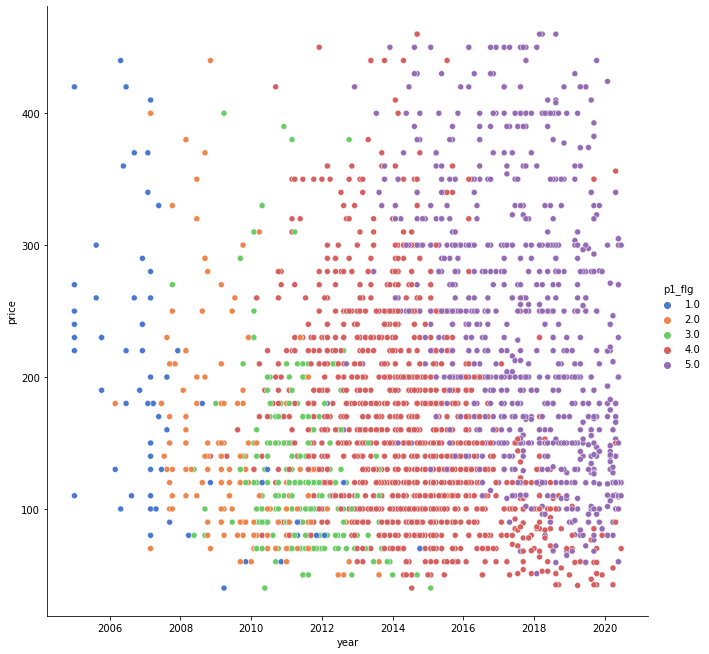

In [72]:
check['p1_flg'] = check.p1.apply(p1c)
plt.figure(figsize=(10,15))
# plt.scatter(check.year, check.price)
# kk = sns.relplot(data=check, x=np.log(check['cpu']), y='p1', height=9) #np.log(check['speed'])
# kk.axes[0][0].xaxis.set_major_locator((MultipleLocator(0.5)))
# kk.axes[0][0].yaxis.set_major_locator((MultipleLocator(1)))
kk = sns.relplot(data=check[check.price < 3500], x='year', y='price', height=9, hue='p1_flg', palette='muted')


In [56]:
check[((check.memory < np.exp(6.5)) == True) & ((check.p1 < 12) == True) & ((check.memory > np.exp(6)) == True) & ((check.p1 > 11) == True)]


,year,speed,cpu,memory,w,slen,ratio,p1,p2,p3,oem,cam,disp,price,p1_flg
3464,2019.153846,150.0,1.3,512.0,NaN,125.3,26.4,11.511324,NaN,1.362578,Energizer,300000.0,76800.0,NaN,4.0


In [57]:
check[((check.memory < np.exp(9.9)) == True) & ((check.p1 < 14.1) == True) & ((check.memory > np.exp(9.5)) == True) & ((check.p1 > 10) == True)].describe()
# check[((check.memory < np.exp(8.5)) == True) & ((check.p1 < 12.9) == True) & ((check.memory > np.exp(8.25)) == True) & ((check.p1 > 8) == True)].describe()

,year,speed,cpu,memory,w,slen,ratio,p1,p2,p3,cam,disp,price,p1_flg
count,231.000000,231.000000,231.000000,231.0,62.000000,225.000000,225.000000,231.000000,62.000000,230.000000,2.300000e+02,2.310000e+02,171.000000,231.0
mean,2014.250416,19.098268,1.350684,16384.0,0.766935,147.887556,65.288889,12.612649,10.854886,-inf,8.711087e+06,8.986825e+05,202.896199,4.0
std,2.491178,12.833773,0.275709,0.0,0.378399,28.169687,6.176367,0.959016,1.265631,NaN,4.040609e+06,4.910511e+05,75.210747,0.0
min,2010.076923,3.100000,0.434000,16384.0,0.150000,100.500000,41.700000,10.150284,6.644901,-inf,0.000000e+00,1.536000e+05,42.500000,4.0
25%,2012.153846,7.200000,1.200000,16384.0,0.475000,131.000000,61.700000,11.678142,10.248112,2.112682,5.000000e+06,5.184000e+05,160.000000,4.0
50%,2014.076923,21.100000,1.300000,16384.0,0.735000,143.300000,66.300000,13.015698,11.009146,2.161086,8.000000e+06,9.216000e+05,200.000000,4.0
75%,2015.846154,21.100000,1.500000,16384.0,1.070000,154.000000,69.300000,13.223337,11.651185,2.646593,1.300000e+07,9.216000e+05,250.000000,4.0
max,2020.307692,50.000000,2.500000,16384.0,1.540000,260.000000,85.000000,14.021549,13.227801,5.181510,4.100000e+07,3.145728e+06,440.000000,4.0


In [58]:
# check[((check.memory < np.exp(9.9)) == True) & ((check.p1 < 20.1) == True) & ((check.memory > np.exp(9.5)) == True) & ((check.p1 > 14.2) == True)].describe()
check[((check.memory < np.exp(8.5)) == True) & ((check.p1 < 20.9) == True) & ((check.memory > np.exp(8.25)) == True) & ((check.p1 > 12.9) == True)].describe()

,year,speed,cpu,memory,w,slen,ratio,p1,p2,p3,cam,disp,price,p1_flg
count,52.000000,52.000000,52.000000,52.0,10.000000,52.000000,52.000000,52.000000,10.000000,52.000000,5.200000e+01,52.000000,42.000000,52.0
mean,2015.235207,140.384615,1.236538,4096.0,0.856000,136.588462,57.580769,13.455877,10.750658,2.564368,5.159615e+06,426812.307692,137.830905,4.0
std,1.877525,19.897930,0.152147,0.0,0.328133,13.848885,14.402315,0.142254,0.588014,0.403370,2.084114e+06,211139.008059,71.025322,0.0
min,2012.307692,100.000000,1.000000,4096.0,0.450000,117.700000,19.800000,13.105258,9.995362,1.650260,2.000000e+06,76800.000000,50.000000,4.0
25%,2014.153846,150.000000,1.200000,4096.0,0.675000,129.500000,58.425000,13.423712,10.328903,2.266446,5.000000e+06,384000.000000,84.991500,4.0
50%,2014.692308,150.000000,1.200000,4096.0,0.830000,133.550000,62.650000,13.510723,10.785785,2.501231,5.000000e+06,409920.000000,130.000000,4.0
75%,2015.442308,150.000000,1.300000,4096.0,0.952500,142.850000,65.375000,13.510723,11.098316,2.736450,8.000000e+06,518400.000000,167.500000,4.0
max,2019.692308,150.000000,1.700000,4096.0,1.570000,192.700000,72.100000,13.733867,11.847661,3.259698,8.000000e+06,921600.000000,350.000000,4.0


In [59]:
check['speed'].value_counts()

150.0000     1230
21.1000       865
7.2000        571
300.0000      415
0.3840        397
3.6000        285
3.1000        249
42.2000       168
600.0000      121
14.4000       120
100.0000       82
1200.0000      49
10.2000        47
1024.0000      43
0.1532         42
400.0000       33
450.0000       32
1.8000         24
2000.0000      21
800.0000       16
1400.0000      12
1600.0000       5
2.8000          3
10.0000         2
50.0000         2
1960.0000       2
28.0000         1
5.7600          1
1000.0000       1
250.0000        1
Name: speed, dtype: int64

# ПИ 2

(w / ((len ** 2) * (cpu ** 3))) ** -1

In [60]:
# left = check.slen.quantile(0.01)
# right = check.slen.quantile(0.99)
check.slen = check.slen.apply(lambda x: x if x <= 225 else np.nan)

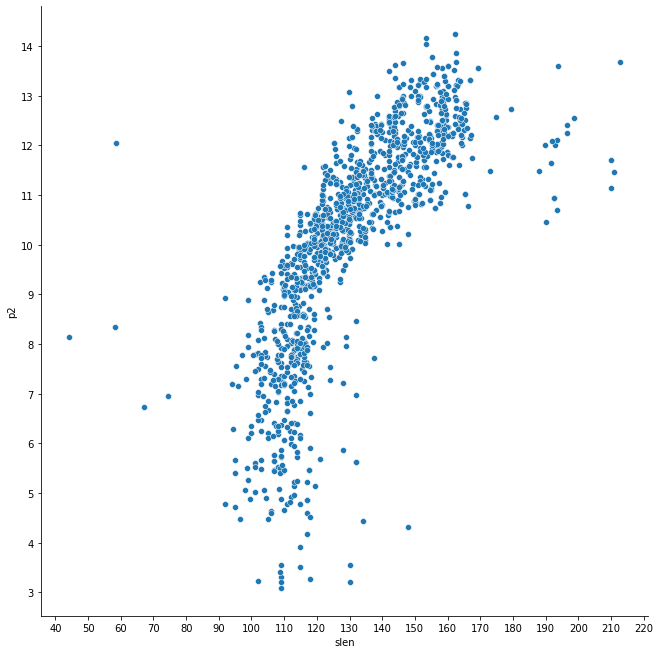

In [61]:
kk = sns.relplot(data=check[check.p2.notnull()], x='slen', y='p2', height=9)
kk.axes[0][0].xaxis.set_major_locator((MultipleLocator(10)))
kk.axes[0][0].yaxis.set_major_locator((MultipleLocator(1)))

тут где-то 21 * e^e/e^3 - максимальная длина

переход около 9 для slen - целое значение

1.4 GHz = 21 по длине волны для log(cpu)

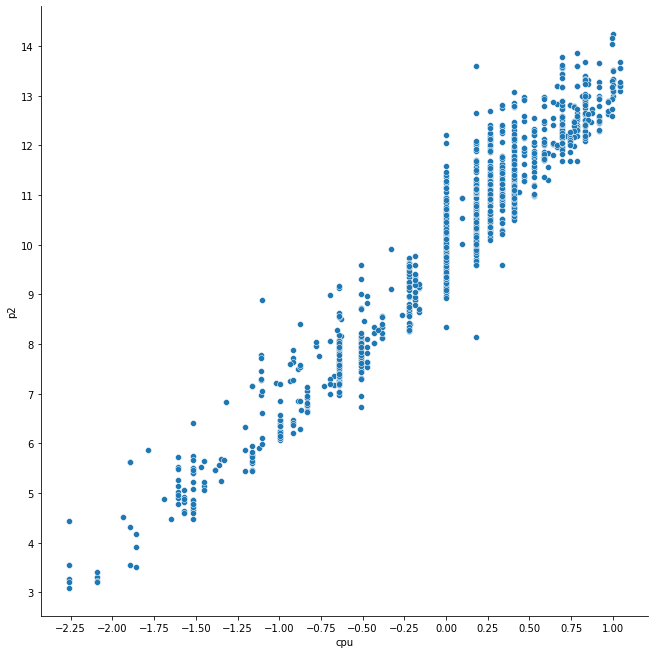

In [62]:
k21 = sns.relplot(data=check[check.p2.notnull()], x=np.log(check['cpu']), y='p2', height=9)
k21.axes[0][0].xaxis.set_major_locator((MultipleLocator(0.25)))
k21.axes[0][0].yaxis.set_major_locator((MultipleLocator(1)))

# ПИ 3

cam / disp

In [63]:
def p3c(x):
    if x < 1: return 1
    elif x >= 1 and x < 2: return 2
    elif x >= 2 and x <=3: return 3
    elif x > 3 and x < 4: return 4
    elif x >= 4: return 5
    else: return 0

# def p3c(x):
#     if x <=2.5: return 0
#     else: return 1

<Figure size 1080x1080 with 0 Axes>

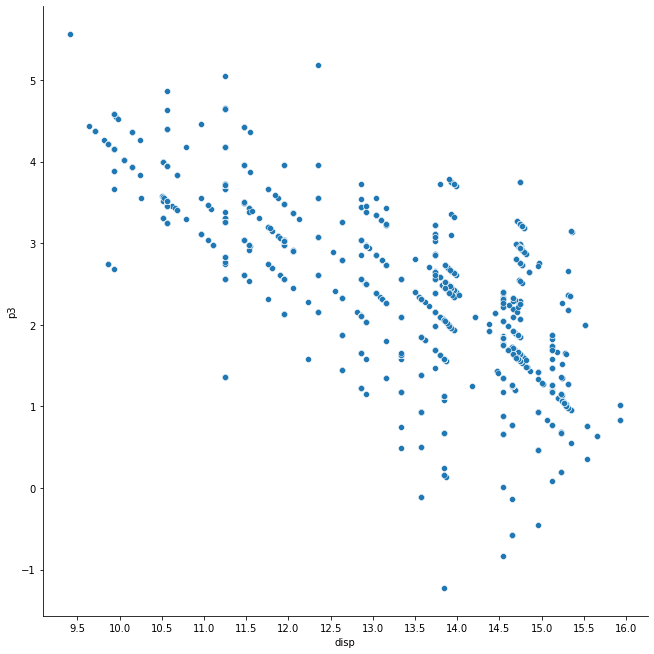

In [64]:
check['p3_flg'] = check.p3.apply(p3c)
plt.figure(figsize=(15,15))
# plt.scatter(check.year, check.price)
kk = sns.relplot(data=check, x=np.log(check['disp']), y='p3', height=9) #np.log(check['disp'])
# kk = sns.relplot(data=check[check.price < 500], x='year', y='price', height=9, hue='p3_flg', palette='muted')
kk.axes[0][0].xaxis.set_major_locator((MultipleLocator(0.5)))
kk.axes[0][0].yaxis.set_major_locator((MultipleLocator(1)))

Выделить пиксели, после 12 мп  структура ломается

In [65]:
check[((check.disp < np.exp(11.15)) == True) & ((check.p3 < 3.2) == True) & ((check.disp > np.exp(10.85)) == True) & ((check.p3 > 2.9) == True)]#.describe()

,year,speed,cpu,memory,w,slen,ratio,p1,p2,p3,oem,cam,disp,price,p1_flg,p3_flg
1576,2004.000000,NaN,0.144,NaN,NaN,118.0,NaN,NaN,NaN,2.972016,BenQ,1300000.0,66560.0,NaN,NaN,3
2819,2006.692308,NaN,0.312,64.0,NaN,107.0,29.1,NaN,NaN,3.036554,BlackBerry,1300000.0,62400.0,200.0,NaN,4
3816,2006.153846,NaN,0.416,64.0,NaN,118.0,NaN,NaN,NaN,3.116597,HP,1300000.0,57600.0,NaN,NaN,4
3818,2005.000000,NaN,0.312,64.0,NaN,118.0,34.7,NaN,NaN,3.116597,HP,1300000.0,57600.0,280.0,NaN,4
6295,2004.000000,0.384,0.168,24.0,NaN,116.0,37.2,0.437150,NaN,2.972016,Motorola,1300000.0,66560.0,NaN,1.0,3
6794,2005.000000,NaN,0.144,18.0,0.45,118.0,35.0,NaN,4.526051,2.972016,Nokia,1300000.0,66560.0,230.0,NaN,3
7068,2007.153846,0.384,0.300,60.0,0.59,111.0,31.3,1.933259,6.334775,3.116597,Palm,1300000.0,57600.0,80.0,1.0,4
7070,2006.692308,0.384,0.300,60.0,NaN,111.0,31.3,1.933259,NaN,3.116597,Palm,1300000.0,57600.0,NaN,1.0,4


In [66]:
check[((check.disp < np.exp(12)) == True) & ((check.p3 < 2.25) == True) & ((check.disp > np.exp(11.85)) == True) & (check.p3 > 0)]#.describe()

,year,speed,cpu,memory,w,slen,ratio,p1,p2,p3,oem,cam,disp,price,p1_flg,p3_flg
1877,2014.769231,NaN,1.0,256.0,NaN,112.2,52.4,NaN,NaN,2.135768,alcatel,1300000.0,153600.0,NaN,NaN,3
3017,2014.307692,21.100,1.0,512.0,NaN,117.0,50.3,9.287598,NaN,2.135768,BLU,1300000.0,153600.0,70.0,3.0,3
3056,2012.923077,NaN,NaN,128.0,NaN,114.0,53.3,NaN,NaN,2.135768,BLU,1300000.0,153600.0,50.0,NaN,3
3199,2014.000000,NaN,NaN,NaN,NaN,102.0,40.2,NaN,NaN,2.135768,Celkon,1300000.0,153600.0,NaN,NaN,3
3230,2013.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.135768,Celkon,1300000.0,153600.0,NaN,NaN,3
3243,2013.615385,NaN,NaN,NaN,NaN,112.0,45.4,NaN,NaN,2.135768,Celkon,1300000.0,153600.0,NaN,NaN,3
3310,2012.000000,NaN,NaN,NaN,NaN,110.0,44.7,NaN,NaN,2.135768,Celkon,1300000.0,153600.0,NaN,NaN,3
4707,2014.307692,0.384,1.2,512.0,NaN,116.9,49.9,5.463533,NaN,2.135768,Lava,1300000.0,153600.0,NaN,2.0,3
5737,2014.000000,7.200,1.0,512.0,1.16,NaN,NaN,8.212406,NaN,2.135768,Micromax,1300000.0,153600.0,50.0,3.0,3
7506,2015.076923,NaN,1.0,512.0,NaN,117.8,50.3,NaN,NaN,2.135768,Plum,1300000.0,153600.0,NaN,NaN,3


In [67]:
check[((check.disp < np.exp(12)) == True) & ((check.disp > np.exp(11.85)) == True) & ((check.p3 > 3.8) == True)]#.describe()

,year,speed,cpu,memory,w,slen,ratio,p1,p2,p3,oem,cam,disp,price,p1_flg,p3_flg
5900,2010.846154,3.1,NaN,8192.0,1.29,111.3,51.6,NaN,NaN,3.952845,Microsoft,8000000.0,153600.0,160.0,NaN,4
5902,2010.307692,7.2,NaN,8192.0,NaN,115.1,45.8,NaN,NaN,3.952845,Microsoft,8000000.0,153600.0,330.0,NaN,4


In [68]:
corr = check.corr()

<AxesSubplot:>

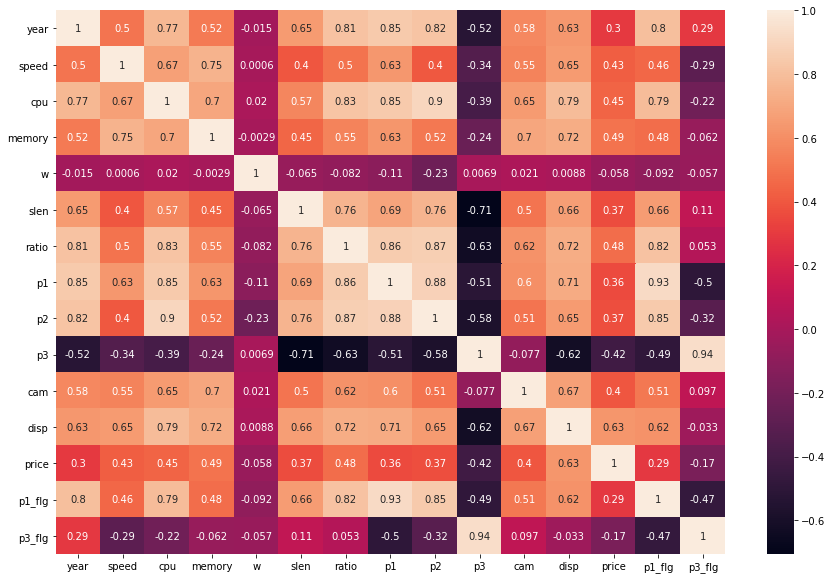

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [70]:
corr1 = check[check.year > 2012].corr()

<AxesSubplot:>

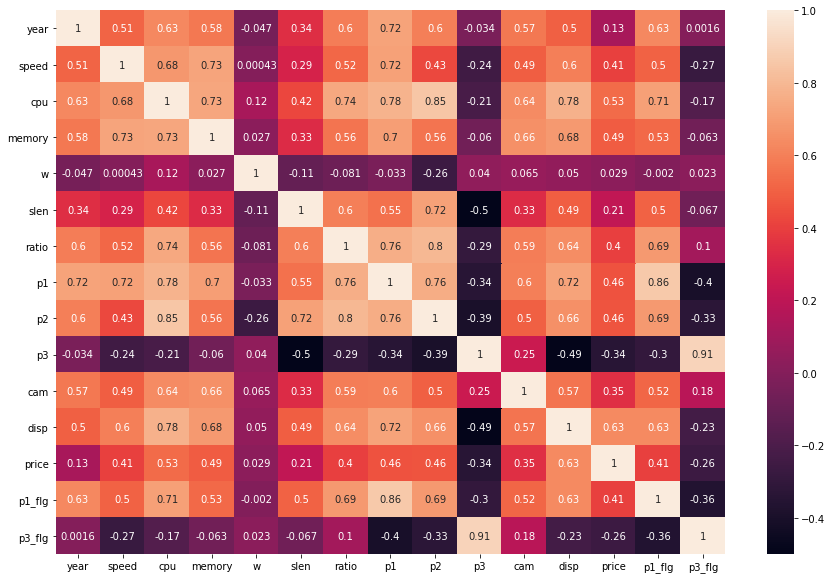

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(corr1, annot=True)